# Predicción obesidad

Primero que todo leo el "About Dataset" para poder ir teniendo una idea general de lo que quiero hacer y como hacerlo. En este caso, puedo recolectar datos importantes como:
- $Cantidad$ $de$ $registros$ : Como son pocos registros para mi, lo voy a tener en cuenta para la pre-elección de modelos, en este caso por el tiempo ajustado que me propuse voy a elegir modelos no tan avanzados ni complejos. Lo ideal sería probar la mayor cantidad de modelos posibles y compararlos, pero como el tiempo es finito voy a realizar una pre-elección de 3 modelos.
  
- $Cantidad$ $de$ $características$ : Creo que para la cantidad de registros que tengo en el dataset no va a hacer falta tantos y seguro los elimine mas adelante.

- $Modelo$ $de$ $clasificación$ $multiclase$ : Al ver la variable objetivo "NObeyesdad" puedo deducir que se trata de un problema de clasificación multiclase. (Aunque también, por como está construido el dataset, podría ser un problema de clustering o regresión)

- $Datos$ $sintéticos$ : Cuentan que hay datos sintéticos ya en los 2111 registros, asi que lo ideal sería no seguir agregando más ya que puede ser contraproducente.

- $Datos$ $catégoricos$ $y$ $númericos$ : Presencia de variables categóricas como númericas, por ejemplo, "FCVC – Frequency of vegetable consumption (scale from 1 to 3)" y  "FAVC – If the person frequently consumes high-calorie foods (yes/no)."

### Importar librerias

Utilizo las librerias más importantes para manipulación de datos ($numpy$ y $pandas$), visualización ($matplotlib$ y $seaborn$), preprocesamiento ($StandardScaler$ y $OneHotEncoder$), división del dataset ($train$ $test$ $split$), selección del mejor modelo ($GridSearchCV$), evaluación de modelos de clasificación multiclase ($accuracy$ $score$, $classification$ $report$, $confusion$ $matrix$) y validación cruzada ($cross$ $val$ $score$ y $StratifiedKFold$).

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Para simplificar el flujo de trabajo

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

En la pre-elección de modelos voy a elegir:
- $RandomForest$ : Por su robustez, maneja bien tanto las variables categóricas como númericas y funciona bien con datasets medianos.
  
- $Regresión$ $Logística$ : Es simple y facil de interpretar, creo que lo voy a usar de modelo de base de comparación.
  
- $XGBoost$ : Es altamente preciso, es rápido y escalable. Pero es ideal cuando tenes tiempo para entrenarlo con muchas pruebas. En este caso no lo voy a utilizar debido a tiempos, pero si no me hubiera puesto yo este deadline, probablemente me quedaría con el.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier

Empecemos con la implementación

### Exploración de datos

In [22]:
df = pd.read_csv(r'C:\Users\rosta\Prueba\ObesityDataSet_raw_and_data_sinthetic.csv')

In [24]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Puedo apreciar que el dataset se cargó correctamente y de paso puedo darme una idea de como es.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

A partir de esta información puedo deducir lo siguiente:
- Confirmamos que hay 2111 registros, y además variables tanto categóricas como númericas.
- Algo nuevo como la NO presencia de valores nulls en nuestro dataset (esto va a facilitar el análisis).

In [31]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

C:\Users\rosta\AppData\Local\Temp\ipykernel_19240\427532491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NObeyesdad', data=df, palette="viridis")


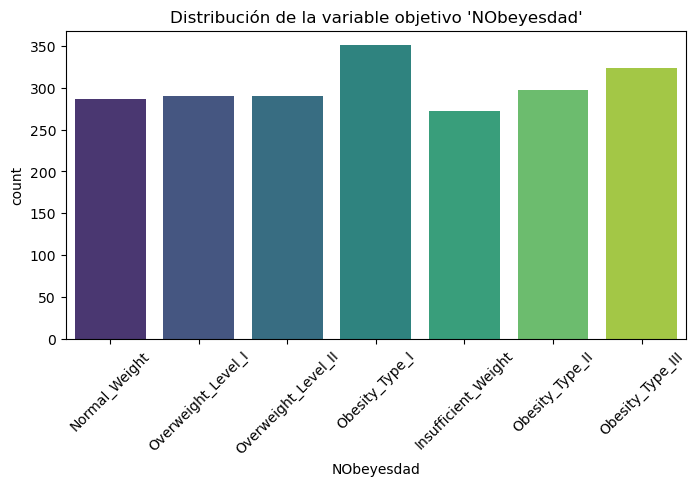

In [33]:
plt.figure(figsize=(8,4))
sns.countplot(x='NObeyesdad', data=df, palette="viridis")
plt.title("Distribución de la variable objetivo 'NObeyesdad'")
plt.xticks(rotation=45)
plt.show()

Me parece totalmente razonable el balanceo de las clases, creo que la creación de datos sintéticos es lo que hizo que esto sea balanceado. Nuevamente, esto también me ahorra pasos.

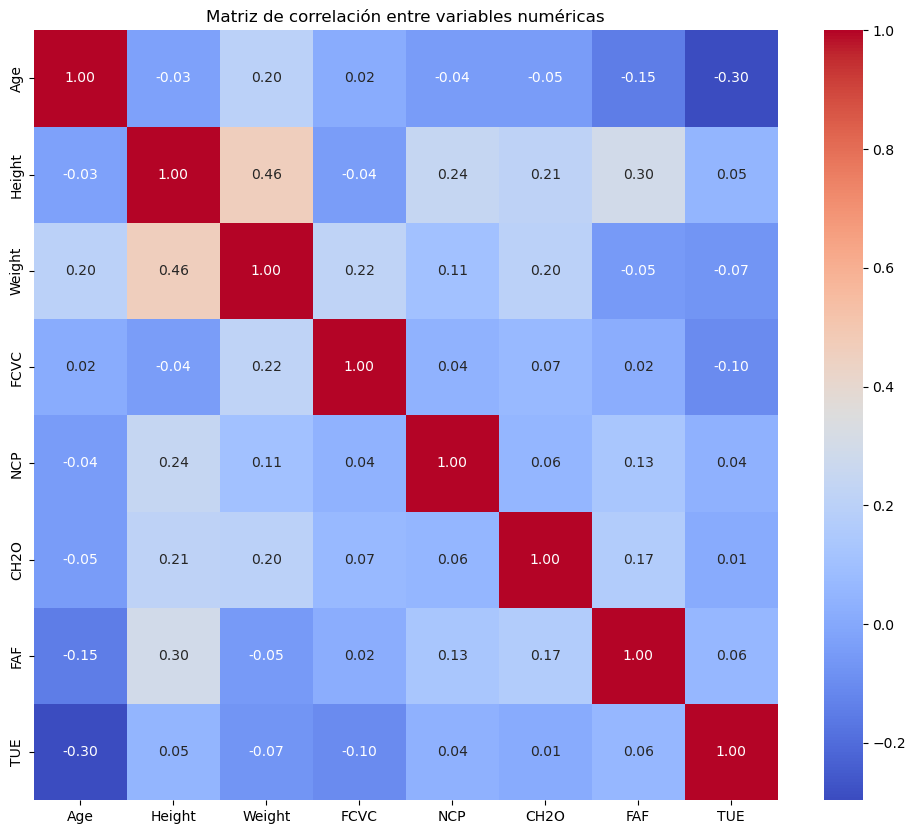

In [35]:
df_numericas = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
sns.heatmap(df_numericas.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

Como no logro apreciar ningún valor cercano al 1 o -1, a priori diria que no existe relación lineal entre las variables. Esto me intuye que el algortimo de regresión logística no va a ser viable, igualmente lo voy a implementar pero no puedo perder de vista esto. (En estos casos creo que es ideal para RandomForest o XGBoost)

### Preprocesamiento de los datos

Voy a estandarizar las escalas de las variables númericas porque el algoritmo de regresión logística es sensible a la escala. Y utilizo OneHotEncoder en vez de LabelEncoder porque este me crearía relaciones falsas, por ejemplo, "caminando" < "auto". Además el OneHotEncoder no afecta al algoritmo RandomForest ya que las variables categóricas que tienen más de 2 categorias no llegan a tener ni 10 categorias, por lo que no me genera muchas columnas.

In [39]:
columnas_numericas = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
columnas_categoricas = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [41]:
preprocesamiento = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), columnas_categoricas)  
    ])

### División de datos

Voy a separar en entrenamiento un 80% y test un 20%.

In [43]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Modelado y evaluación

Como anticipé, implementaré dos modelos, uno de regresión logística como base para comparación y el otro será un RandomForest.

In [45]:
modelos = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "Regresión Logística" : LogisticRegression(max_iter=1000)
}

Para reducir el sobreajuste y para facilitar la comparación de modelos voy a utilizar la técnica de validación cruzada KFold. Y en este caso la estratificada porque garantiza que cada fold mantenga la proporción de la variable objetivo, evitando folds en clases minoritarias.

In [47]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Creo el pipeline (lo utilizo porque siento que es la mejor forma de ser ordenado y escalable). Evaluo los dos modelos elegidos y obtengo el accuracy promedio y su desviación estándar entre los folds para validar que el modelo generaliza bien y no depende de una división específica de los datos.

In [49]:
for nombre, modelo in modelos.items():
    pipeline = Pipeline(steps=[
        ('Preprocesamiento', preprocesamiento),
        ('Clasificador', modelo)
    ])

    # validacion cruzada
    scores = cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=kf,
        scoring='accuracy',
        n_jobs=-1,
        error_score='raise'
    )

    print(f"Modelo:{nombre}")
    print(f"Accuracy promedio: {scores.mean():4f} (+-{scores.std():4f})")
    print("---------------------------------------------------------")

Modelo:Random Forest
Accuracy promedio: 0.944902 (+-0.004060)
---------------------------------------------------------
Modelo:Regresión Logística
Accuracy promedio: 0.877966 (+-0.015560)
---------------------------------------------------------


Ahora evaluo en el conjunto de prueba para confirmar que no hay overfitting.

In [51]:
for nombre, modelo in modelos.items():
    pipeline = Pipeline([
        ('Preprocesamiento', preprocesamiento),
        ('Clasificador', modelo)
     ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{nombre} - Test Accuracy: {accuracy:-4f}")

Random Forest - Test Accuracy: 0.940898
Regresión Logística - Test Accuracy: 0.879433


Me parece que los modelos tuvieron un buen desempeño, el Random Forest superior como lo habíamos previsto, pero creo que es un buen rendimiento 87% para un modelo lineal.

No me voy a quedar solo con el accuracy para evaluar un modelo, así que voy a hacer una matriz de confusión y chequearemos el classification report.

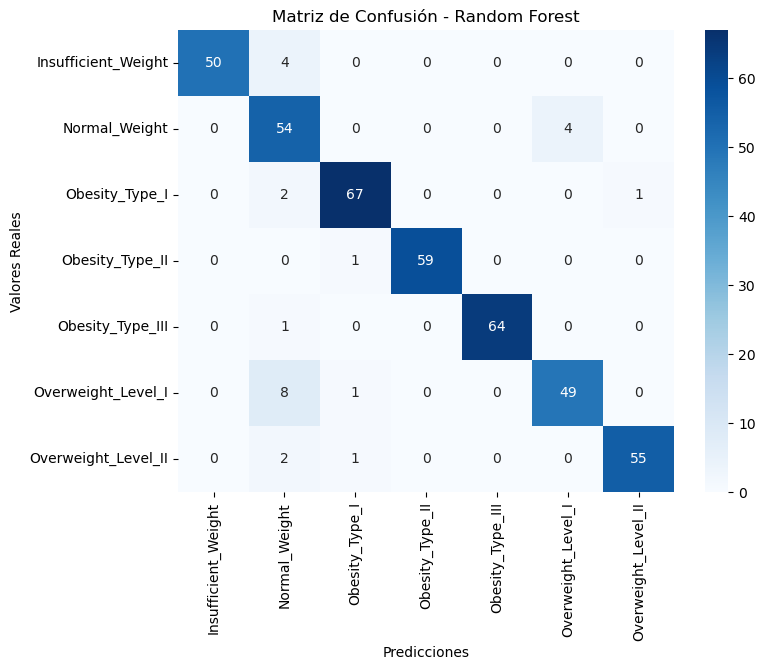

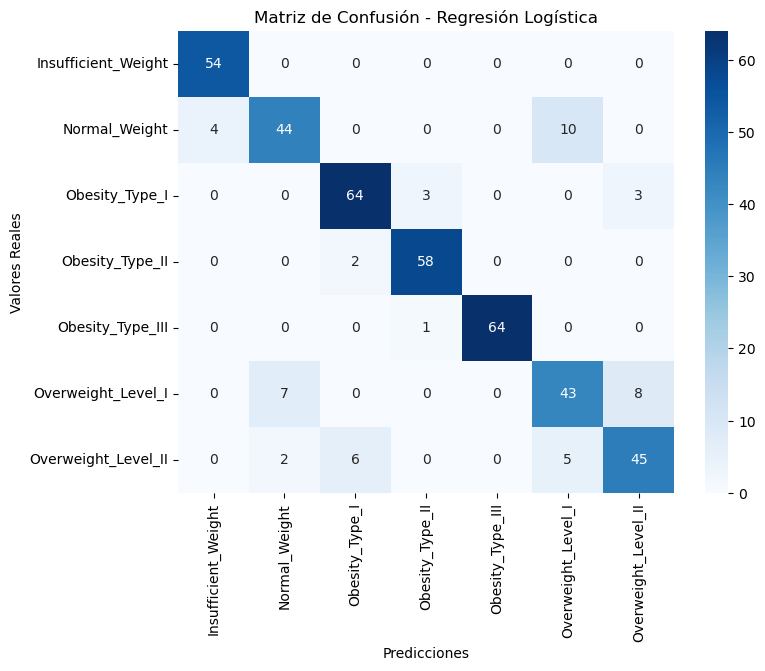

In [53]:
for nombre, modelo in modelos.items():
    pipeline = Pipeline([
        ('Preprocesamiento', preprocesamiento),
        ('Clasificador', modelo)  
    ])
    pipeline.fit(X_train, y_train)  
    y_pred = pipeline.predict(X_test)  

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=modelo.classes_, yticklabels=modelo.classes_)
    plt.xlabel("Predicciones")
    plt.ylabel("Valores Reales")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.show()

Noto que en ambos casos la mayoría de las malas predicciones tienen que ver con Normal_Weight y Overweight_level_I entre sí. Para solucionar este problema voy a ajustar los hiperparámetros de ambos modelos para mejorar su capacidad para diferenciar entre estas clases.

In [55]:
for nombre, modelo in modelos.items():
    pipeline = Pipeline([
        ('Preprocesamiento', preprocesamiento),
        ('Clasificador', modelo) 
    ])
    pipeline.fit(X_train, y_train)  
    y_pred = pipeline.predict(X_test) 
    print(f"\nReporte de clasificación para {nombre}:")
    print(classification_report(y_test, y_pred)) 


Reporte de clasificación para Random Forest:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        54
      Normal_Weight       0.76      0.93      0.84        58
     Obesity_Type_I       0.96      0.96      0.96        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.92      0.84      0.88        58
Overweight_Level_II       0.98      0.95      0.96        58

           accuracy                           0.94       423
          macro avg       0.95      0.94      0.94       423
       weighted avg       0.95      0.94      0.94       423


Reporte de clasificación para Regresión Logística:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.96        54
      Normal_Weight       0.83      0.76      0.79        58
     Obesity_Type_I       0.89      0.91    

Aca se logra apreciar de nuevo la poca precisión de las clases Normal_Weight y Overweight_Level_I en relación a la precisión de las demás.

### Ajuste de hiperparámetros

Voy a usar GridSearchCV en el mejor modelo, en este caso es el Random Forest.

Defino un nuevo pipeline que solo contenga a mi modelo Random Forest.

In [57]:
pipeline_rf = Pipeline(steps=[
    ('Preprocesamiento', preprocesamiento),
    ('Clasificador', RandomForestClassifier(random_state=42))
])

Hiperparámetros a explorar:
- $n$ $estimators$ : Número de árboles
- $max$ $depth$ : Profundidad máxima
- $min$ $samples$ $split$ : Mínimo muestras para dividir un nodo

In [59]:
param_grid = {
    'Clasificador__n_estimators': [50,100,200,300],
    'Clasificador__max_depth' : [None, 10, 20,30],
    'Clasificador__min_samples_split' : [2,5,10],
    'Clasificador__class_weight' : [None, 'balanced']
}

Configuro el grid con validación cruzada estratificada y ejecuto la búsqueda con los datos de entrenamiento

In [61]:
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring= 'accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print(f"\nMejores parámetros: {grid_search.best_params_}")
print(f"Mejor accuracy en validación:{grid_search.best_score_:.4f}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits

Mejores parámetros: {'Clasificador__class_weight': None, 'Clasificador__max_depth': None, 'Clasificador__min_samples_split': 2, 'Clasificador__n_estimators': 100}
Mejor accuracy en validación:0.9449


Como era de esperar, no veo mejoras en el accuracy, el modelo ya estaba cerca de su máximo rendimineto posible con los hiperparámetros por defecto. Así que no es necesario insistir en mejorarlo.

### Interpretación del Modelo

Por último, antes de sacar conclusiones, voy a extraer las importancias de la variables. 

Obtengo el modelo entrenado del pipeline

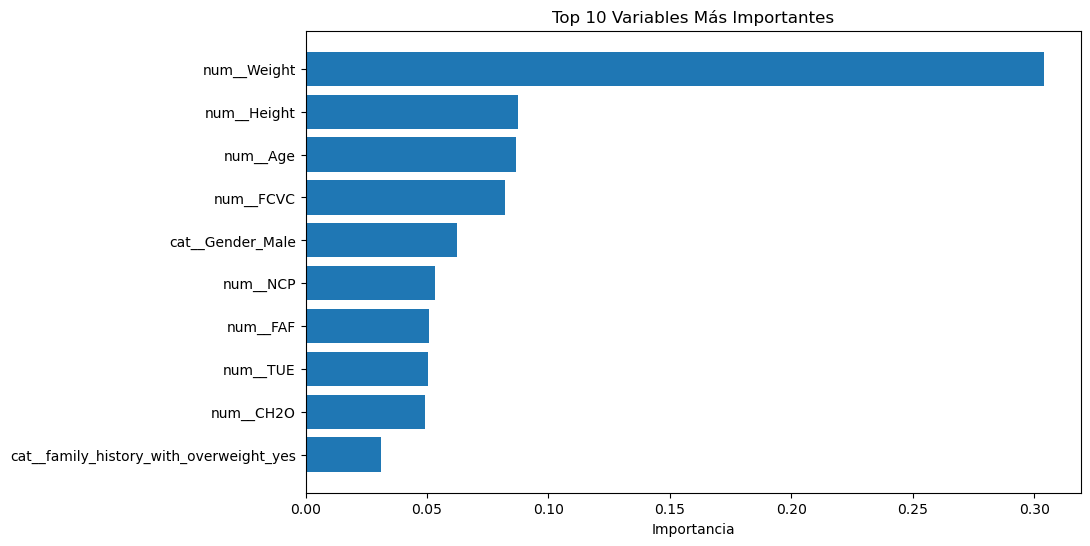

In [62]:
mejor_modelo = grid_search.best_estimator_
rf_modelo = mejor_modelo.named_steps['Clasificador']

preprocesamient = mejor_modelo.named_steps['Preprocesamiento']
caracteristicas = preprocesamient.get_feature_names_out()

df_importancias = pd.DataFrame({
    'Variable' : caracteristicas,
    'Importancia' : rf_modelo.feature_importances_
}).sort_values('Importancia', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df_importancias['Variable'][:10], df_importancias['Importancia'][:10])
plt.title('Top 10 Variables Más Importantes')
plt.xlabel('Importancia')
plt.gca().invert_yaxis()
plt.show()

Los resultados obtenidos son totalmente intuitivos, es decir, cuando vas a un médico para ver el estado de tu salud las primeras características tuyas que te piden es tu Peso, Altura y Edad. Lo único que me parece "raro" es que el historial familiar no sea tan influyente a la hora de medir tu obesidad.

### Conclusión

El $Random$ $Forest$ es la mejor opción para las predicciones precisas, y la $Regresión$ $Logística$ me pareció útil para explicar cómo influyen variables individuales. En cuanto a la interpretabilidad del modelo me pareció totalmente lógico el resultado.